In [ ]:

import yfinance as yf
import pandas as pd
import requests

doge = yf.download("DOGE-USD", start="2020-01-01", end="2025-08-28", interval="1d")


cg_url = "https://api.coingecko.com/api/v3/coins/dogecoin"
response = requests.get(cg_url).json()
circulating_supply = response["market_data"]["circulating_supply"]

print(f"Circulating Supply (estimated): {circulating_supply:,.0f} DOGE")


doge["Market Cap (approx)"] = doge["Close"] * circulating_supply

doge.to_csv("doge_2020_2025_with_mcap.csv")
x=doge
df=x
df


/tmp/ipython-input-1138163097.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  doge = yf.download("DOGE-USD", start="2020-01-01", end="2025-08-28", interval="1d")
[*********************100%***********************]  1 of 1 completed


Circulating Supply (estimated): 150,693,806,384 DOGE


Price,Close,High,Low,Open,Volume,Market Cap (approx)
Ticker,DOGE-USD,DOGE-USD,DOGE-USD,DOGE-USD,DOGE-USD,
Date,,,,,,
2020-01-01,0.002033,0.002052,0.002021,0.002028,51180941,3.063605e+08
2020-01-02,0.002009,0.002110,0.001983,0.002034,65071106,3.027438e+08
2020-01-03,0.002145,0.002177,0.001991,0.002008,62619988,3.232382e+08
2020-01-04,0.002241,0.002490,0.002050,0.002144,94227582,3.377048e+08
2020-01-05,0.002419,0.002491,0.002117,0.002240,52631740,3.645283e+08
...,...,...,...,...,...,...
2025-08-23,0.236009,0.240593,0.229271,0.240588,2633509850,3.556509e+10
2025-08-24,0.231798,0.244502,0.228374,0.236021,3243609548,3.493052e+10


/tmp/ipython-input-732625624.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(coins, start="2020-01-01", end="2025-8-28")["Close"]
[*********************100%***********************]  3 of 3 completed


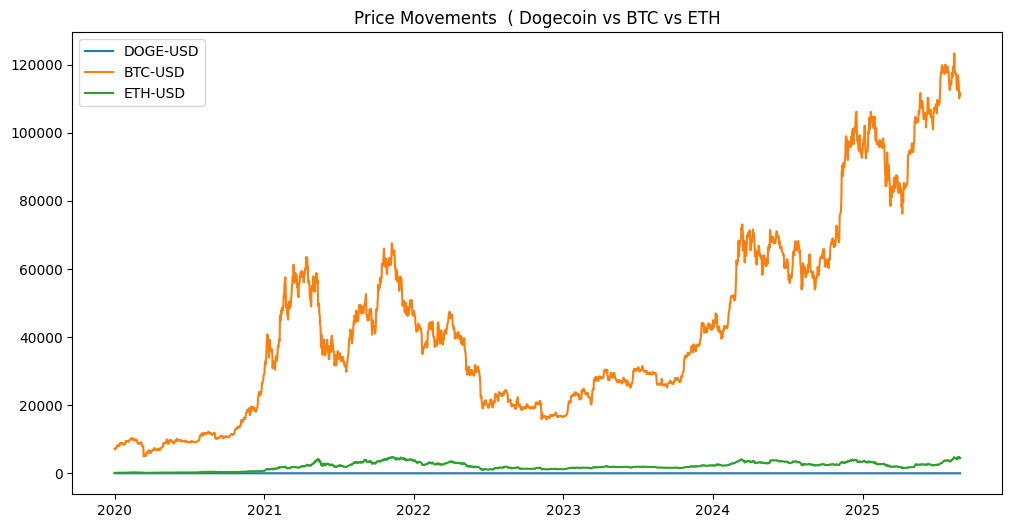

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt


coins = ["DOGE-USD","BTC-USD","ETH-USD"]
data = yf.download(coins, start="2020-01-01", end="2025-8-28")["Close"]


plt.figure(figsize=(12,6))
for coin in coins:
    plt.plot(data.index, data[coin], label=coin)

plt.title("Price Movements  ( Dogecoin vs BTC vs ETH")
plt.legend()
plt.show()

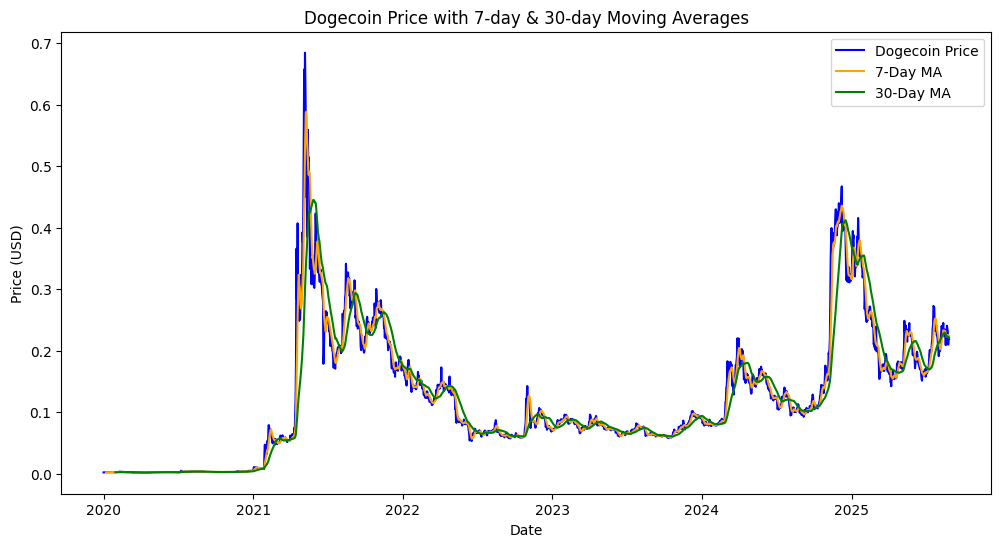

In [ ]:

doge["MA7"] = doge["Close"].rolling(window=7).mean()
doge["MA30"] = doge["Close"].rolling(window=30).mean()


import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(doge.index, doge["Close"], label="Dogecoin Price", color="blue")
plt.plot(doge.index, doge["MA7"], label="7-Day MA", color="orange")
plt.plot(doge.index, doge["MA30"], label="30-Day MA", color="green")
plt.title("Dogecoin Price with 7-day & 30-day Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()





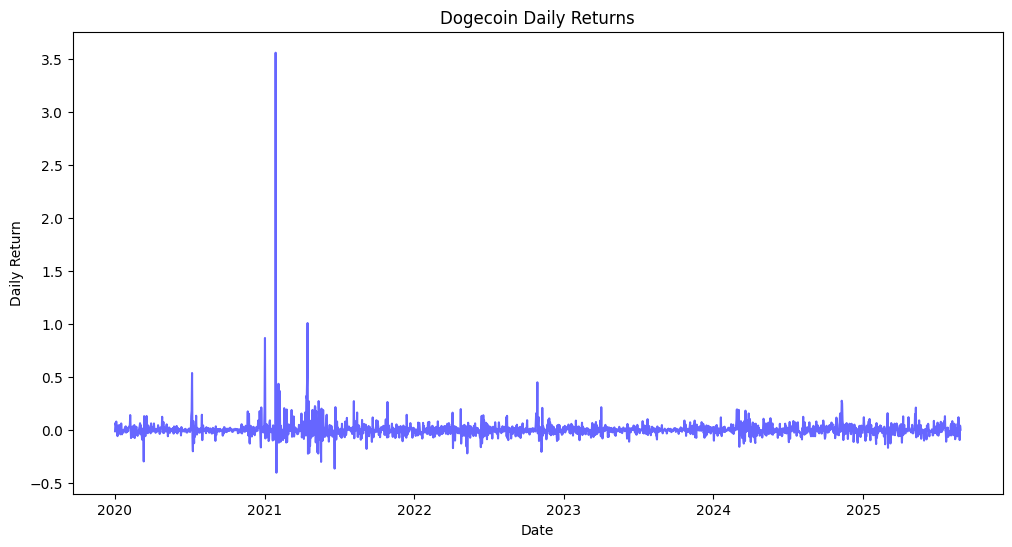

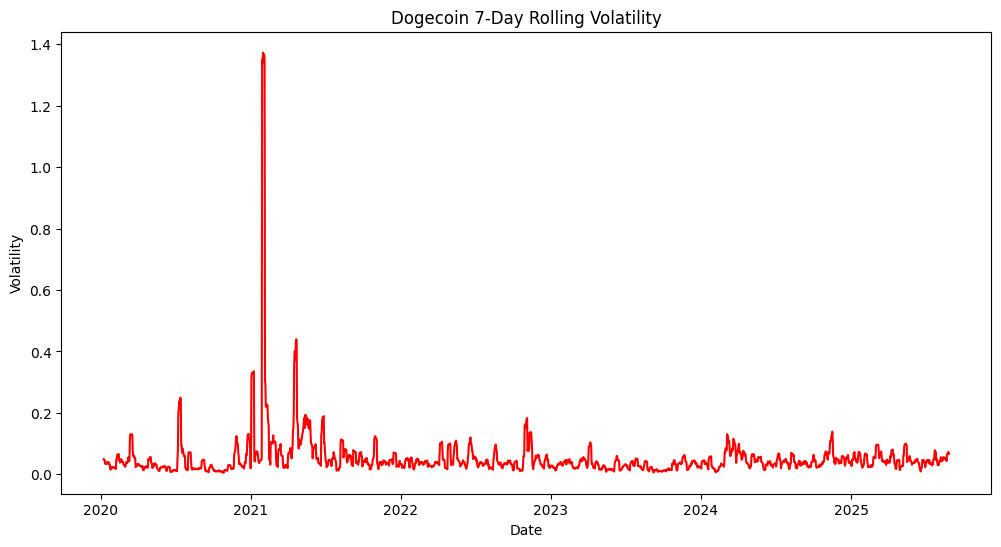

Price          Close Daily_Return Volatility_7d
Ticker      DOGE-USD                           
Date                                           
2020-01-01  0.002033          NaN           NaN
2020-01-02  0.002009    -0.011805           NaN
2020-01-03  0.002145     0.067695           NaN
2020-01-04  0.002241     0.044755           NaN
2020-01-05  0.002419     0.079429           NaN
2020-01-06  0.002463     0.018189           NaN
2020-01-07  0.002433    -0.012180           NaN
2020-01-08  0.002293    -0.057542      0.049098
2020-01-09  0.002256    -0.016136      0.049567
2020-01-10  0.002356     0.044326      0.046323
2020-01-11  0.002314    -0.017827      0.045521
2020-01-12  0.002381     0.028954      0.034521
2020-01-13  0.002358    -0.009660      0.033428
2020-01-14  0.002470     0.047498      0.038701
2020-01-15  0.002369    -0.040891      0.034677


In [ ]:

doge["Daily_Return"] = doge["Close"].pct_change()


doge["Volatility_7d"] = doge["Daily_Return"].rolling(window=7).std()

plt.figure(figsize=(12,6))
plt.plot(doge.index, doge["Daily_Return"], color="blue", alpha=0.6)
plt.title("Dogecoin Daily Returns")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.show()

plt.figure(figsize=(12,6))
plt.plot(doge.index, doge["Volatility_7d"], color="red")
plt.title("Dogecoin 7-Day Rolling Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.show()

print(doge[["Close", "Daily_Return", "Volatility_7d"]].head(15))



In [ ]:
import pandas as pd
import numpy as np


doge['lag1'] = doge['Close'].shift(1)
doge['lag7'] = doge['Close'].shift(7)
doge['MA_7'] = doge['Close'].rolling(7).mean()
doge['MA_30'] = doge['Close'].rolling(30).mean()


doge['target'] = doge['Close'].shift(-7)


doge = doge.dropna()


features = ['Close', 'Volume', 'lag1', 'lag7', 'MA_7', 'MA_30']
X = doge[features]
y = doge['target']

split_idx = int(len(doge) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]


**Applying Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest → RMSE: {rmse_rf:.4f}, R²: {r2_rf:.4f}")



Random Forest → RMSE: 0.0432, R²: 0.7860


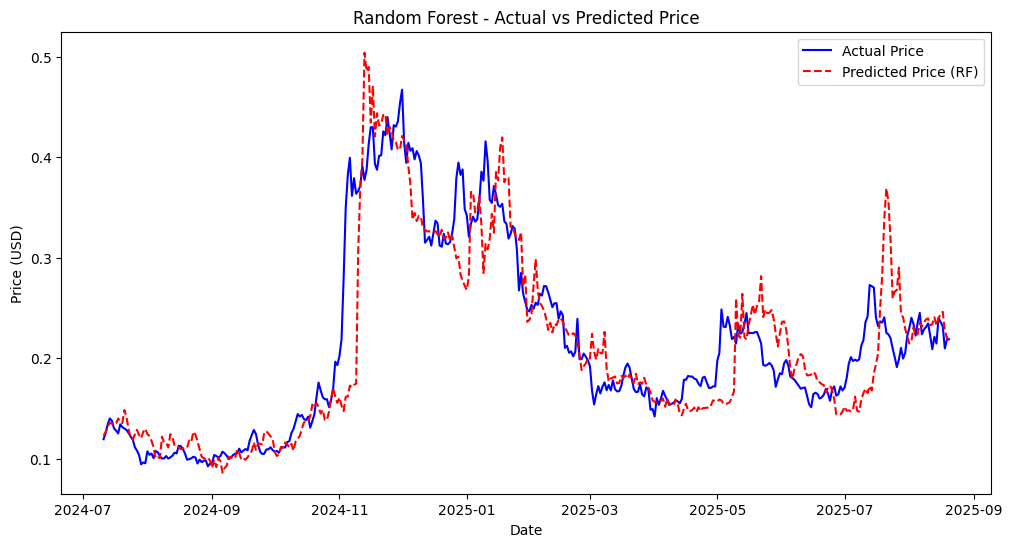

In [ ]:
import matplotlib.pyplot as plt


y_test_pred = rf.predict(X_test)

plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label="Actual Price", color="blue")
plt.plot(y_test.index, y_test_pred, label="Predicted Price (RF)", color="red", linestyle="--")

plt.title("Random Forest - Actual vs Predicted Price")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

**Applying XGBoost**

In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost → RMSE: {rmse_xgb:.4f}, R²: {r2_xgb:.4f}")


XGBoost → RMSE: 0.0470, R²: 0.7466


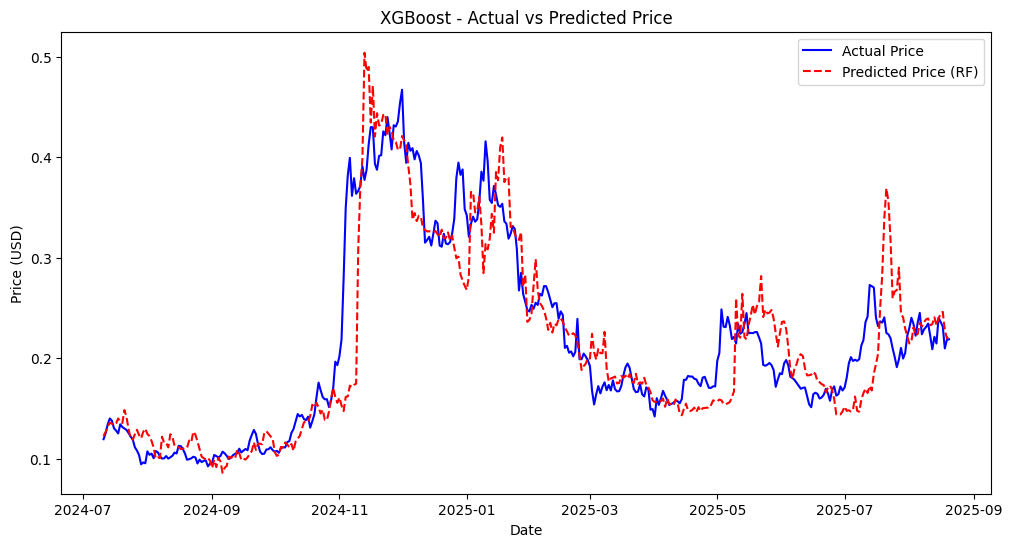

In [ ]:
import matplotlib.pyplot as plt

y_test_pred = rf.predict(X_test)

plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label="Actual Price", color="blue")
plt.plot(y_test.index, y_test_pred, label="Predicted Price (RF)", color="red", linestyle="--")

plt.title("XGBoost - Actual vs Predicted Price")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

In [ ]:
print("Model Comparison:")
print(f"Random Forest - RMSE: {rmse_rf:.4f}, R²: {r2_rf:.4f}")
print(f"XGBoost       - RMSE: {rmse_xgb:.4f}, R²: {r2_xgb:.4f}")


Model Comparison:
Random Forest - RMSE: 0.0432, R²: 0.7860
XGBoost       - RMSE: 0.0470, R²: 0.7466


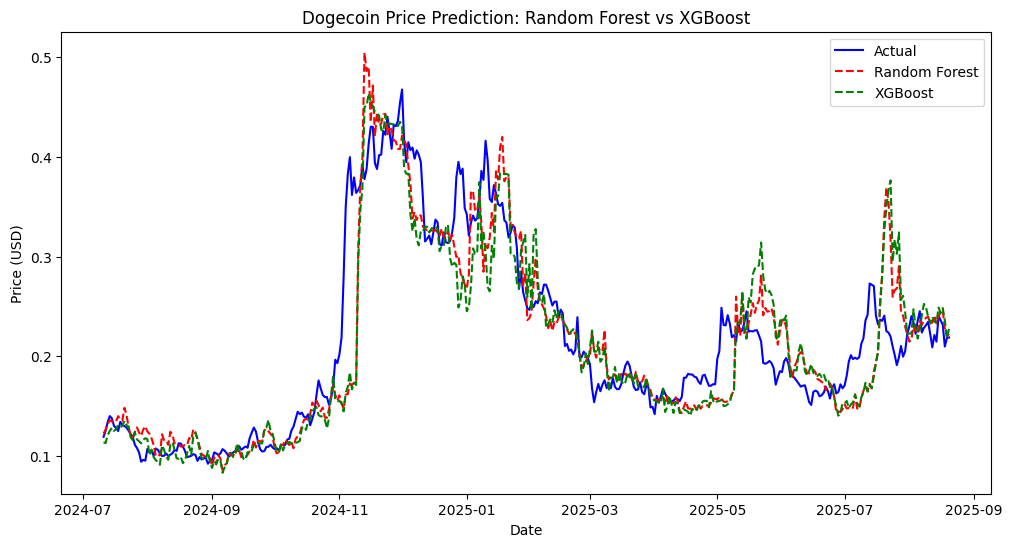

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, y_pred_rf, label='Random Forest', color='red', linestyle='--')
plt.plot(y_test.index, y_pred_xgb, label='XGBoost', color='green', linestyle='--')
plt.title("Dogecoin Price Prediction: Random Forest vs XGBoost")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("Model Evaluation Metrics")
print(f"Random Forest → RMSE: {rmse_rf:.4f}, MAE: {mae_rf:.4f}, R²: {r2_rf:.4f}")
print(f"XGBoost       → RMSE: {rmse_xgb:.4f}, MAE: {mae_xgb:.4f}, R²: {r2_xgb:.4f}")


Model Evaluation Metrics
Random Forest → RMSE: 0.0432, MAE: 0.0274, R²: 0.7860
XGBoost       → RMSE: 0.0470, MAE: 0.0305, R²: 0.7466


**Applying LSTM**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(doge[['Close']])

window = 60
X, y = [], []
for i in range(window, len(scaled)):
    X.append(scaled[i-window:i, 0])
    y.append(scaled[i, 0])

X, y = np.array(X), np.array(y)
X = X.reshape((X.shape[0], X.shape[1], 1))

In [ ]:
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.metrics import MeanAbsoluteError, MeanAbsolutePercentageError

model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=[MeanAbsoluteError(), MeanAbsolutePercentageError()]
)
model.summary()

history = model.fit(
    X_train, y_train,
    epochs=20, batch_size=32,
    validation_data=(X_test, y_test),
    verbose=2
)



/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
50/50 - 6s - 123ms/step - loss: 0.0066 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 404.4168 - val_loss: 0.0025 - val_mean_absolute_error: 0.0319 - val_mean_absolute_percentage_error: 9.5538
Epoch 2/20
50/50 - 2s - 30ms/step - loss: 0.0023 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 109.4490 - val_loss: 0.0020 - val_mean_absolute_error: 0.0294 - val_mean_absolute_percentage_error: 9.2777
Epoch 3/20
50/50 - 2s - 31ms/step - loss: 0.0018 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 102.1667 - val_loss: 0.0019 - val_mean_absolute_error: 0.0265 - val_mean_absolute_percentage_error: 7.9553
Epoch 4/20
50/50 - 1s - 27ms/step - loss: 0.0017 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 89.6424 - val_loss: 0.0017 - val_mean_absolute_error: 0.0253 - val_mean_absolute_percentage_error: 7.5226
Epoch 5/20
50/50 - 1s - 19ms/step - loss: 0.0016 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 63.8591

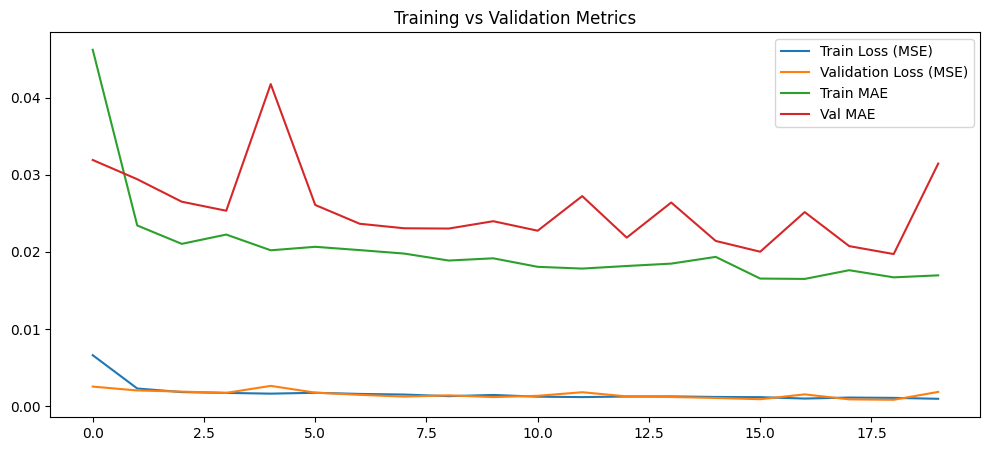

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(history.history['loss'], label='Train Loss (MSE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)')
plt.plot(history.history['mean_absolute_error'], label='Train MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Val MAE')
plt.legend()
plt.title("Training vs Validation Metrics")
plt.show()


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


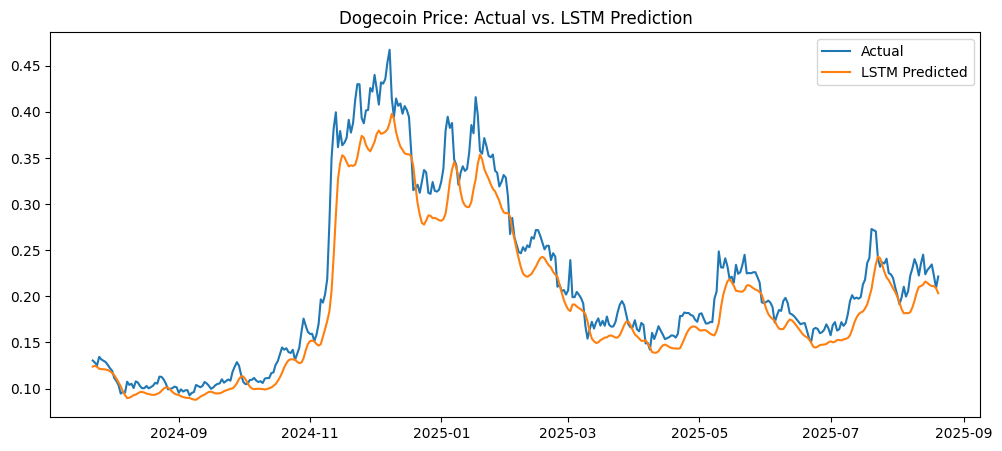

In [ ]:
import matplotlib.pyplot as plt

pred = model.predict(X_test)
pred_rescaled = scaler.inverse_transform(pred)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1,1))

plt.figure(figsize=(12,5))
plt.plot(doge.index[-len(y_test):], y_test_rescaled, label='Actual')
plt.plot(doge.index[-len(y_test):], pred_rescaled, label='LSTM Predicted')
plt.legend()
plt.title("Dogecoin Price: Actual vs. LSTM Prediction")
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test_rescaled, pred_rescaled))
mae  = mean_absolute_error(y_test_rescaled, pred_rescaled)
print(f"LSTM → RMSE: {rmse:.4f}, MAE: {mae:.4f}")


LSTM → RMSE: 0.0295, MAE: 0.0215


In [ ]:
import numpy as np

y_train_pred = model.predict(X_train)
y_test_pred  = model.predict(X_test)


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_mae  = mean_absolute_error(y_train, y_train_pred)
train_r2   = r2_score(y_train, y_train_pred)

test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae  = mean_absolute_error(y_test, y_test_pred)
test_r2   = r2_score(y_test, y_test_pred)

print("Train RMSE:", train_rmse)
print("Train MAE:", train_mae)
print("Train R²:", train_r2)
print("Test RMSE:", test_rmse)
print("Test MAE:", test_mae)
print("Test R²:", test_r2)

Train RMSE: 0.03154480744037068
Train MAE: 0.016251304169090527
Train R²: 0.94624175376559
Test RMSE: 0.04311600424065549
Test MAE: 0.03144219162989909
Test R²: 0.9023441699419673


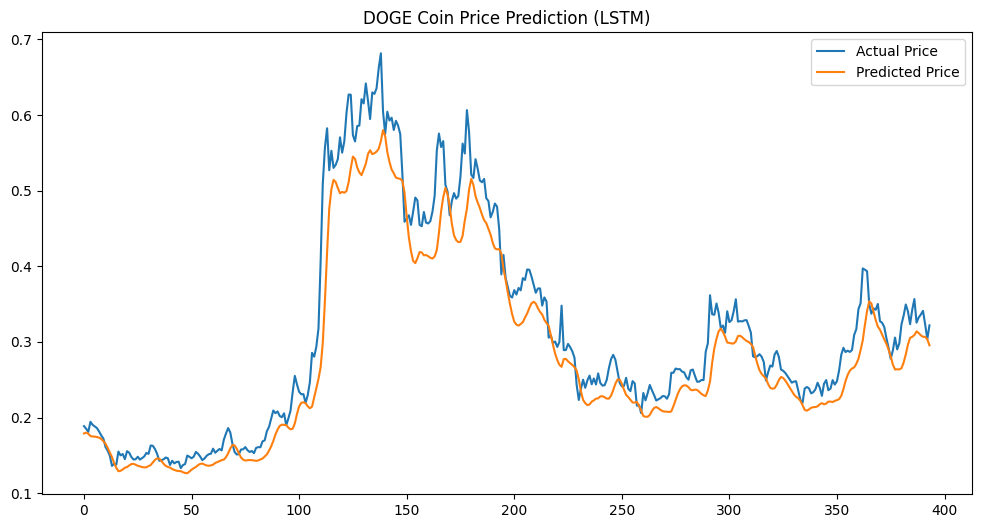

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_test, label="Actual Price")
plt.plot(y_test_pred, label="Predicted Price")
plt.legend()
plt.title("DOGE Coin Price Prediction (LSTM)")
plt.show()


In [ ]:
import joblib
joblib.dump(rf, "doge_rf_model.pkl")

['doge_rf_model.pkl']

In [ ]:
import joblib
joblib.dump(xgb, "doge_xgb_model.pkl")


['doge_xgb_model.pkl']

In [ ]:
from tensorflow.keras.models import load_model
model.save("doge_lstm_model.h5")


In [ ]:
from google.colab import files
files.download("doge_rf_model.pkl")
files.download("doge_xgb_model.pkl")
files.download("doge_lstm_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>